In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [2]:
data = pd.read_csv('Bank Customer Churn Prediction.csv')

In [3]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.select_dtypes(include='object').columns

Index(['country', 'gender'], dtype='object')

In [5]:
def getDetails(data):
  print(data.describe().T)
  print(data.describe(include='O'))
  print(data.info())
  print(f"Null values: {data.isnull().sum().sum()}")
  print(f"Duplicate values: {data.duplicated().sum()}")

In [6]:
getDetails(data)

                    count          mean           std          min  \
customer_id       10000.0  1.569094e+07  71936.186123  15565701.00   
credit_score      10000.0  6.505288e+02     96.653299       350.00   
age               10000.0  3.892180e+01     10.487806        18.00   
tenure            10000.0  5.012800e+00      2.892174         0.00   
balance           10000.0  7.648589e+04  62397.405202         0.00   
products_number   10000.0  1.530200e+00      0.581654         1.00   
credit_card       10000.0  7.055000e-01      0.455840         0.00   
active_member     10000.0  5.151000e-01      0.499797         0.00   
estimated_salary  10000.0  1.000902e+05  57510.492818        11.58   
churn             10000.0  2.037000e-01      0.402769         0.00   

                          25%           50%           75%          max  
customer_id       15628528.25  1.569074e+07  1.575323e+07  15815690.00  
credit_score           584.00  6.520000e+02  7.180000e+02       850.00  
age       

In [7]:
data = data.drop(columns = ['customer_id'])

**EDA**

In [8]:
numerical_data = data.select_dtypes(include='number')
categorical_data = data.select_dtypes(include='object')

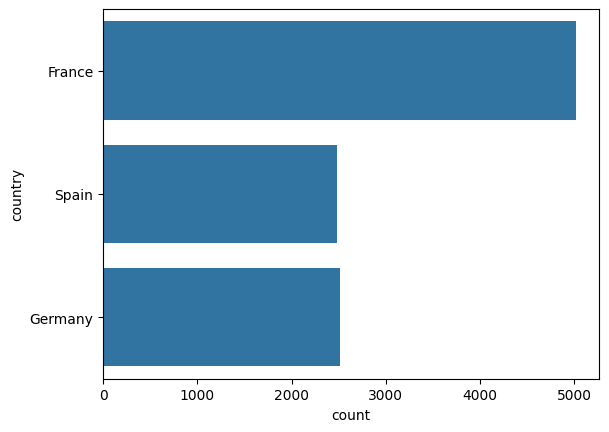

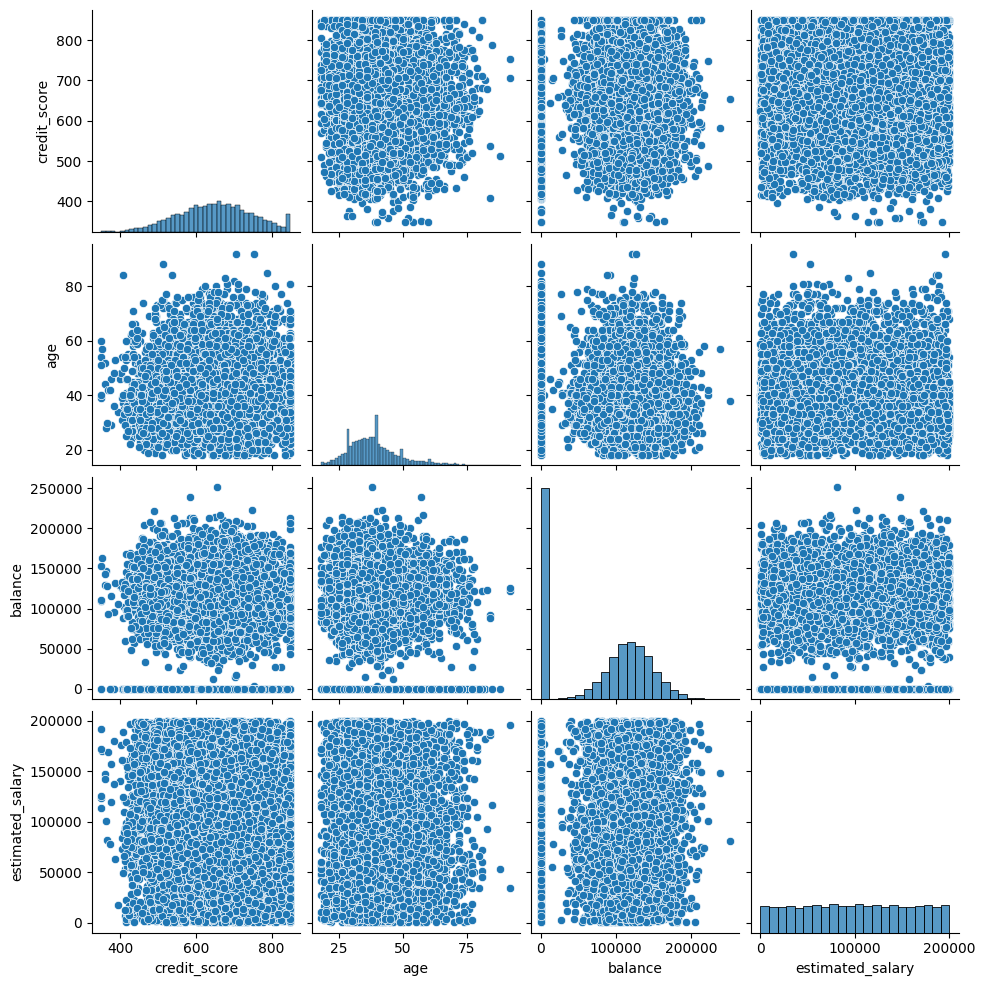

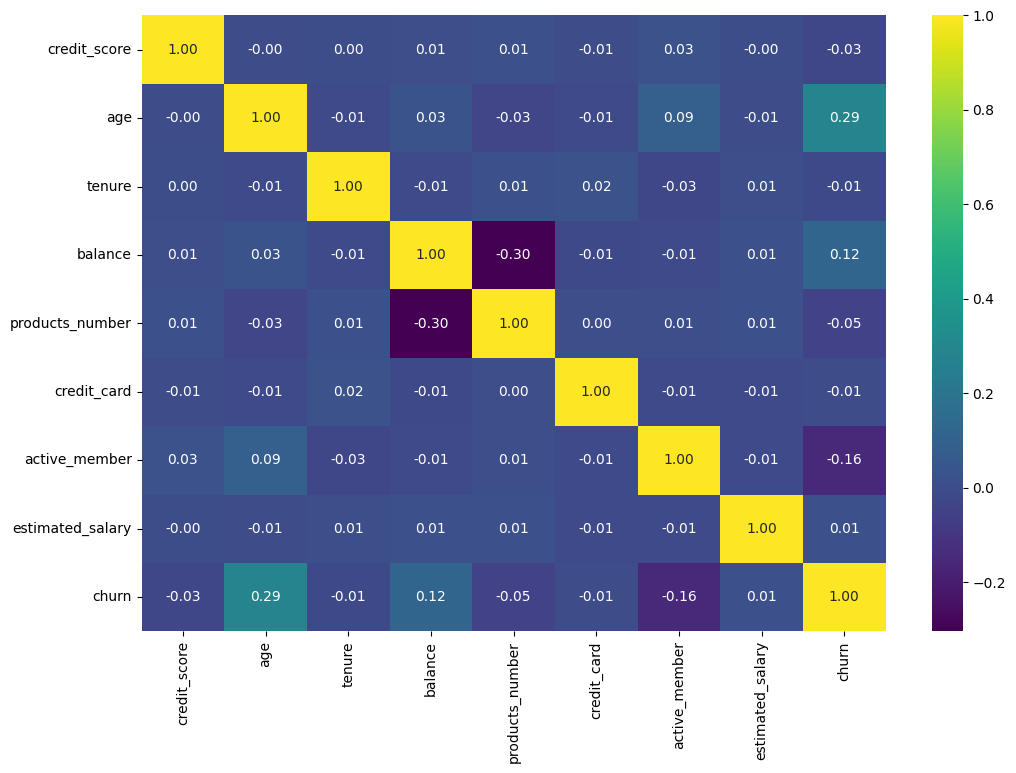

In [9]:
# Countplot
sns.countplot(data['country'])
plt.show()

# Pairplot
sns.pairplot(data[['credit_score', 'age', 'balance', 'estimated_salary']])
plt.show()

# Heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.show()

<ipython-input-10-5e0a9b859ece>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['balance'], ax=axes[0])


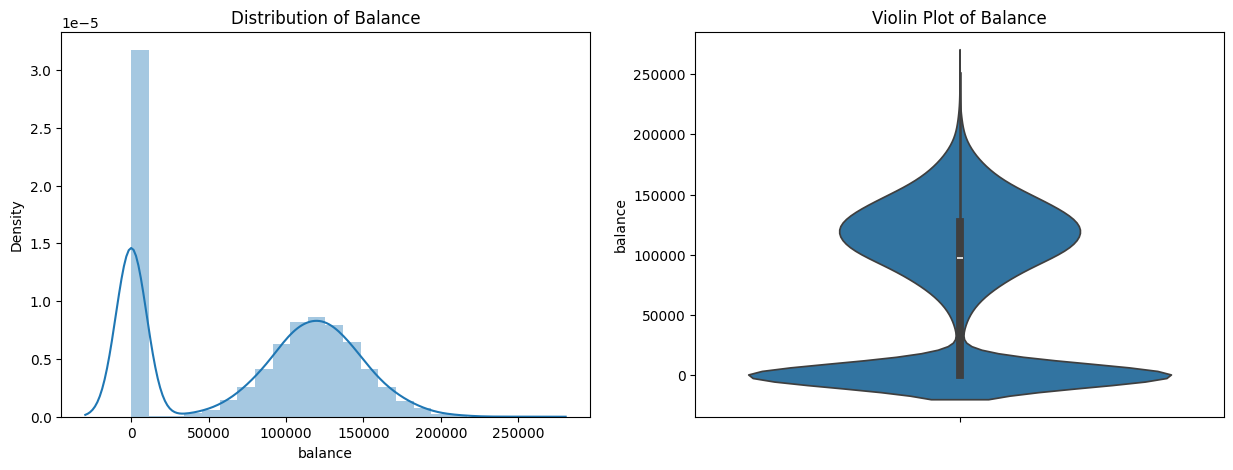

<ipython-input-10-5e0a9b859ece>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['credit_score'], ax=axes[0])


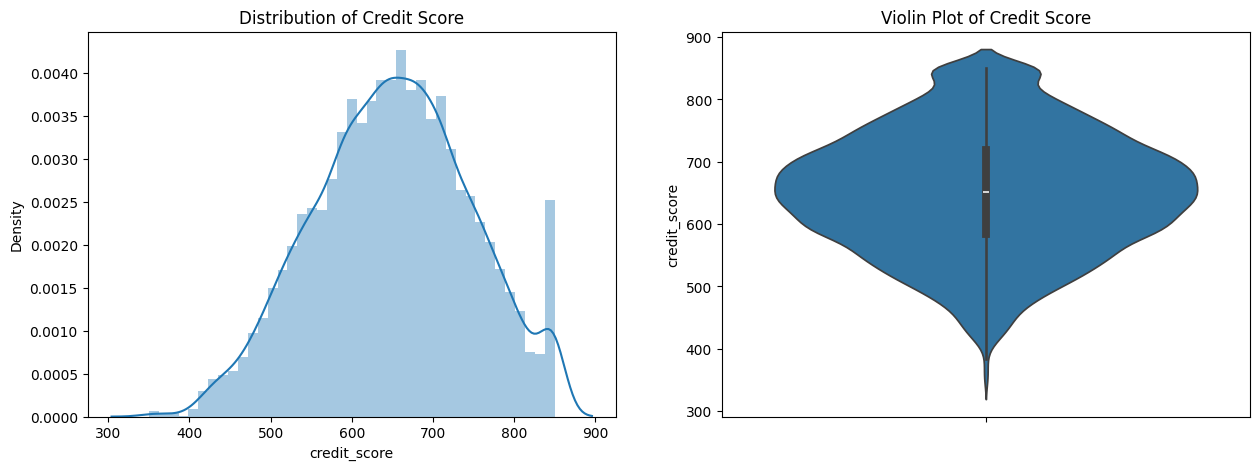

In [10]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distplot for 'balance'
sns.distplot(data['balance'], ax=axes[0])
axes[0].set_title('Distribution of Balance')

# Violin plot for 'balance'
sns.violinplot(y=data['balance'], ax=axes[1])
axes[1].set_title('Violin Plot of Balance')

plt.show()

# Create subplots for 'credit_score'
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distplot for 'credit_score'
sns.distplot(data['credit_score'], ax=axes[0])
axes[0].set_title('Distribution of Credit Score')

# Violin plot for 'credit_score'
sns.violinplot(y=data['credit_score'], ax=axes[1])
axes[1].set_title('Violin Plot of Credit Score')

plt.show()

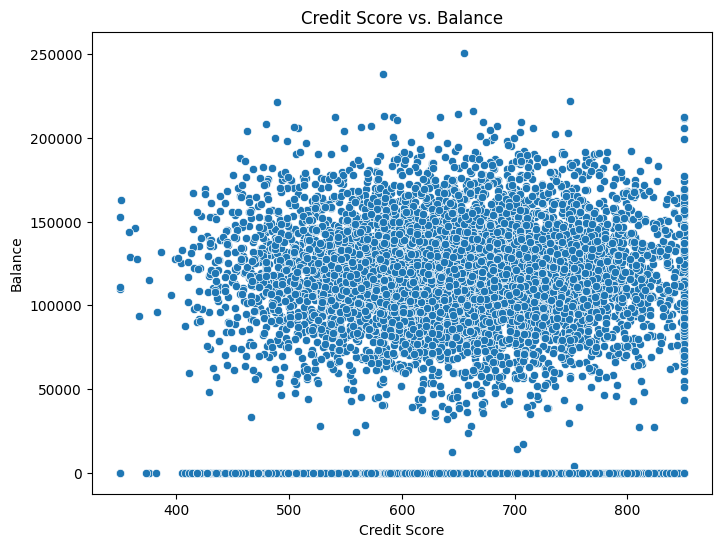

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='credit_score', y='balance', data=data)
plt.title('Credit Score vs. Balance')
plt.xlabel('Credit Score')
plt.ylabel('Balance')
plt.show()

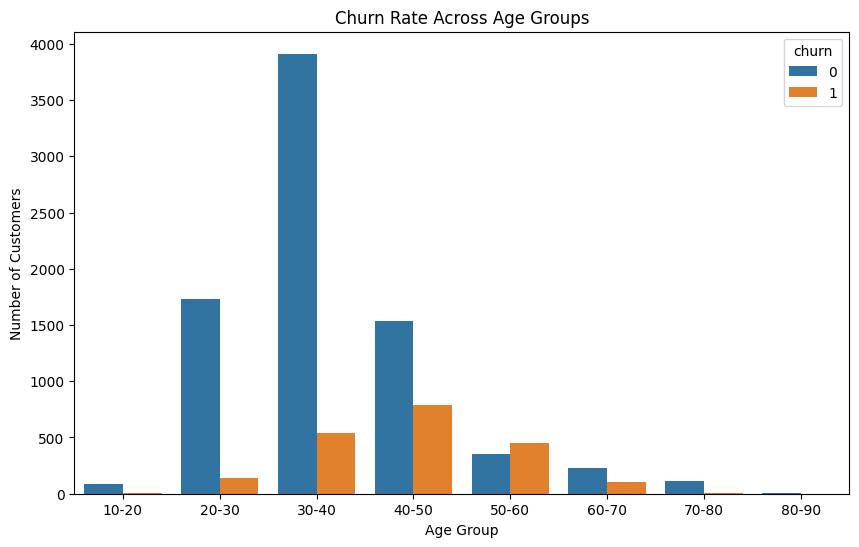

In [12]:
#binning
data['age_bins'] = pd.cut(data['age'], bins=[10, 20, 30, 40, 50, 60, 70, 80, 90],
                          labels=['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])

plt.figure(figsize=(10, 6))
sns.countplot(x='age_bins', hue='churn', data=data)
plt.title('Churn Rate Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.show()

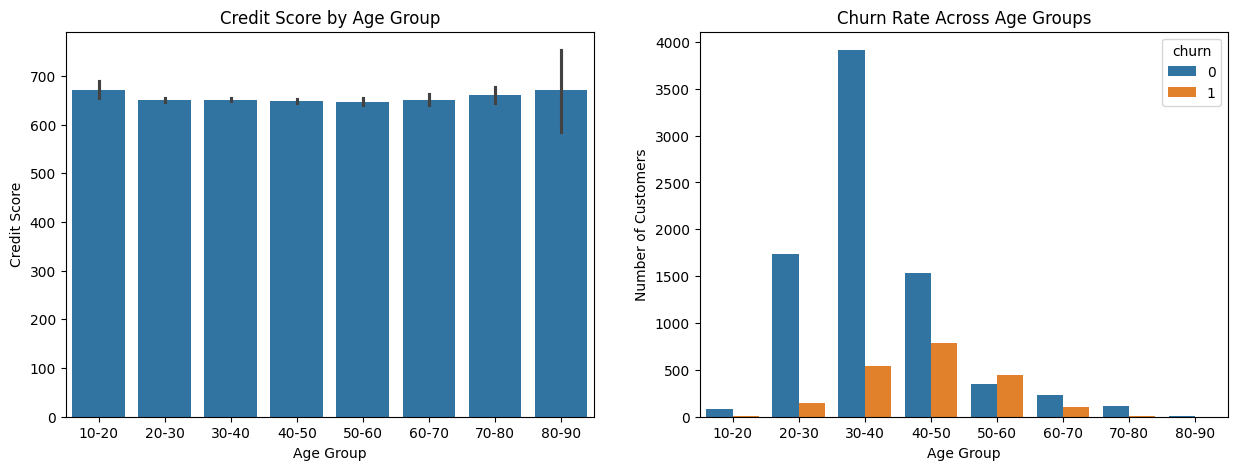

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x='age_bins', y='credit_score', data=data, ax=axes[0])
sns.countplot(x='age_bins', hue='churn', data=data, ax=axes[1])
axes[0].set_title('Credit Score by Age Group')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Credit Score')
axes[1].set_title('Churn Rate Across Age Groups')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Number of Customers')
plt.show()

In [14]:
age_40_50 = data[(data['age'] >= 40) & (data['age'] < 50)]
rest_of_ages = data[(data['age'] < 40) | (data['age'] >= 50)]

ratio = len(age_40_50) / len(rest_of_ages)
print(f"Ratio of 40-50 age group to the rest: {round(ratio,2)}")

churn_40_50 = age_40_50[age_40_50['churn'] == 1]
churn_percentage_40_50 = (len(churn_40_50) / len(age_40_50)) * 100
print(f"Percentage of churn customers in the 40-50 age group: {churn_percentage_40_50:.2f}%")

Ratio of 40-50 age group to the rest: 0.35
Percentage of churn customers in the 40-50 age group: 30.79%


In [15]:
import plotly.express as px

age_counts = data.groupby('age_bins').size()
age_ratios = age_counts / age_counts.sum()

fig1 = px.pie(age_ratios,
              values=age_ratios.values,
              names=age_ratios.index,
              title='Age groups % of the customers',
              hole=0.3)
fig1.show()

age_churn_counts = data.groupby(['age_bins', 'churn']).size().unstack(fill_value=0)
age_churn_ratios = age_churn_counts.div(age_churn_counts.sum(axis=1), axis=0)

fig2 = px.pie(age_churn_ratios,
              values=1,
              names=age_churn_ratios.index,
              title='Age Bin Ratios with Churn',
              hole=0.3)
fig2.show()


<ipython-input-15-bfdd4ed626eb>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts = data.groupby('age_bins').size()


<ipython-input-15-bfdd4ed626eb>:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [16]:
churn_counts = data['churn'].value_counts()
churn_counts

,count
churn,
0,7963
1,2037


Findings:
- Age is directly propotional with Churn rates
- Active members tends to churn less (typical)
- Highest churn rate found in age group between 50 and 60
- Highest count of churn customers found in age groub between 40 and 50
- Lowest churn rate is found in age group between 20-30
- Balance somewhat contributes to churn rates
- Credit score has no impact on our churn rate
- our data is imbalanced, churn customers are less than non-churn customers that will make it hard for the model to predict churn customers



---



**Preprocessing and scaling**

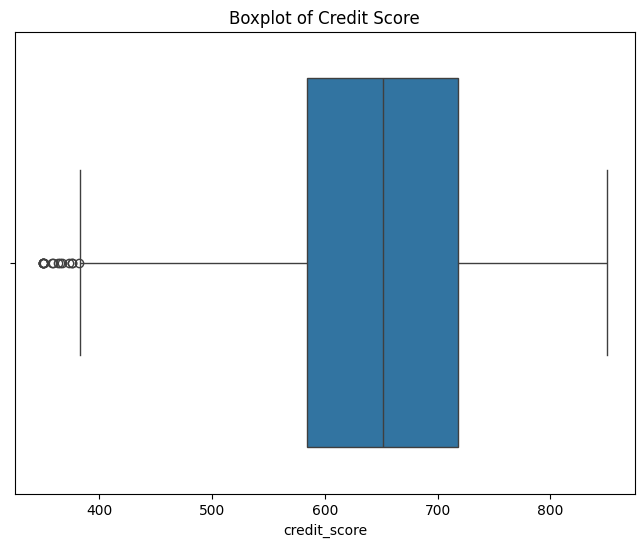

In [17]:
# prompt: Create a visualization of credit_score as a boxplot

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already loaded as in the provided code.

plt.figure(figsize=(8, 6))
sns.boxplot(x=data['credit_score'])
plt.title('Boxplot of Credit Score')
plt.show()

In [18]:
data = data.drop(columns = ['age_bins'])

In [19]:
# prompt: do outlier detection and removal for the data, the data is going to be used for logistic regression so make sure to choose best removal method
numerical_features = ['credit_score', 'age', 'balance', 'estimated_salary']

# Function to remove outliers using IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_filtered = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_filtered

# Remove outliers from numerical features using the IQR method
for feature in numerical_features:
    data_filtered = remove_outliers_iqr(data, feature)

# Reset the index after removing outliers
data_filtered = data_filtered.reset_index(drop = True)

# Now, scale numerical features
scaler = StandardScaler()
data_filtered[numerical_features] = scaler.fit_transform(data_filtered[numerical_features])

In [20]:
data_filtered

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,-0.326221,France,Female,0.293517,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,Spain,Female,0.198164,1,0.117350,1,0,1,0.216534,0
2,-1.536794,France,Female,0.293517,8,1.333053,3,1,0,0.240687,1
3,0.501521,France,Female,0.007457,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,Spain,Female,0.388871,2,0.785728,1,1,1,-0.365276,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,France,Male,0.007457,5,-1.225848,2,1,0,-0.066419,0
9996,-1.391939,France,Male,-0.373958,10,-0.306379,1,1,1,0.027988,0
9997,0.604988,France,Female,-0.278604,7,-1.225848,1,0,1,-1.008643,1
9998,1.256835,Germany,Male,0.293517,3,-0.022608,2,1,0,-0.125231,1


In [21]:
# One-hot encode the categorical features
from sklearn.preprocessing import OneHotEncoder
categorical_features = ['country', 'gender']
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(data_filtered[categorical_features])

In [22]:
one_hot_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
data_filtered = pd.concat([data_filtered, one_hot_df], axis=1)
data_filtered = data_filtered.drop(columns=categorical_features, axis=1)
data_filtered

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,-0.326221,0.293517,2,-1.225848,1,1,1,0.021886,1,0.0,0.0,0.0
1,-0.440036,0.198164,1,0.117350,1,0,1,0.216534,0,0.0,1.0,0.0
2,-1.536794,0.293517,8,1.333053,3,1,0,0.240687,1,0.0,0.0,0.0
3,0.501521,0.007457,1,-1.225848,2,0,0,-0.108918,0,0.0,0.0,0.0
4,2.063884,0.388871,2,0.785728,1,1,1,-0.365276,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,5,-1.225848,2,1,0,-0.066419,0,0.0,0.0,1.0
9996,-1.391939,-0.373958,10,-0.306379,1,1,1,0.027988,0,0.0,0.0,1.0
9997,0.604988,-0.278604,7,-1.225848,1,0,1,-1.008643,1,0.0,0.0,0.0
9998,1.256835,0.293517,3,-0.022608,2,1,0,-0.125231,1,1.0,0.0,1.0




---



**Modeling**

In [23]:
df = data_filtered
y = df['churn']
X = df.drop(columns = ['churn'])

In [38]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y) #oversampling data to avoid imbalance

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



---


Classifier 1: Support Vector Machine

In [40]:
svm = SVC(kernel='linear', C=10)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

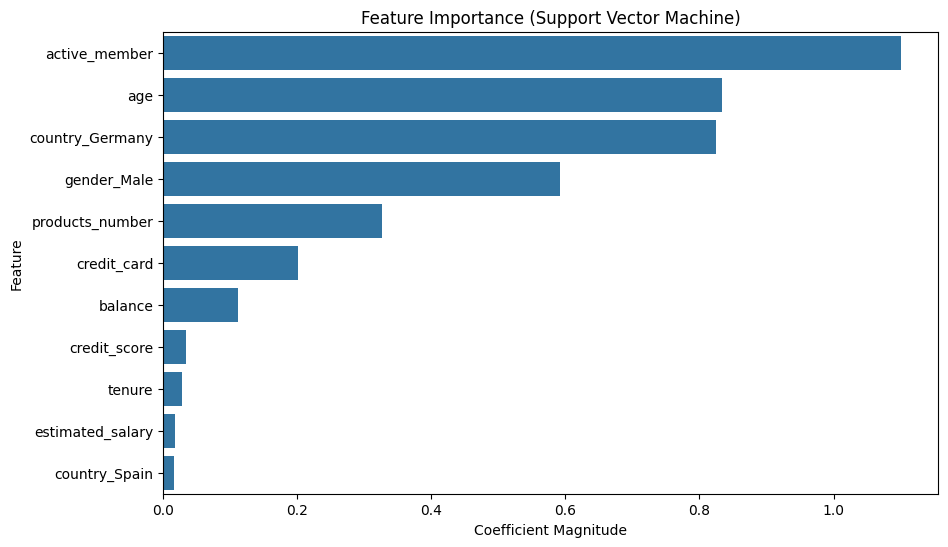

In [57]:
feature_importance = pd.Series(svm.coef_[0], index=X.columns)
feature_importance = feature_importance.abs().sort_values(ascending=False)  # Sort by absolute values
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('Feature Importance (Support Vector Machine)')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.show()



---



Classifier 2: Random Forest

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to co

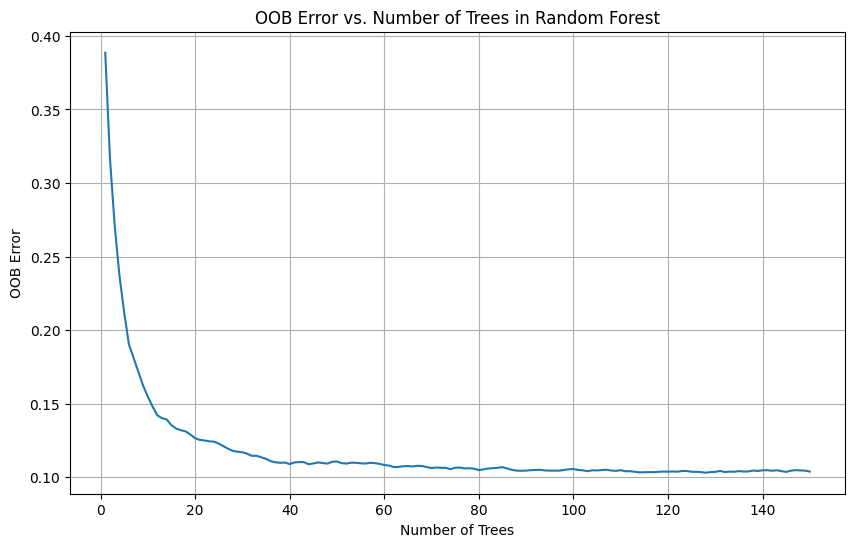

In [41]:
oob_errors = []
num_trees_list = range(1, 151)

for n_trees in num_trees_list:
    rf_classifier = RandomForestClassifier(n_estimators=n_trees, oob_score=True, random_state=42)
    rf_classifier.fit(X_train, y_train)
    oob_error = 1 - rf_classifier.oob_score_
    oob_errors.append(oob_error)

plt.figure(figsize=(10, 6))
plt.plot(num_trees_list, oob_errors)
plt.xlabel("Number of Trees")
plt.ylabel("OOB Error")
plt.title("OOB Error vs. Number of Trees in Random Forest")
plt.grid(True)
plt.show()

In [47]:
rf = RandomForestClassifier(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)



---



Classifier 3: XGboost

In [44]:
XGB = XGBClassifier(n_estimators=150, random_state=42, penalty='l2')
XGB.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[20:22:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "penalty" } are not used.




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, penalty='l2', ...)

In [45]:
y_pred_XGB = XGB.predict(X_test)



---



**Model comparison and Evaluation**

In [69]:
metrics = {
    "Model": ["XGBoost", "Random Forest", "SVM"],
    "Accuracy": [
        round(accuracy_score(y_test, y_pred_XGB),4),
        round(accuracy_score(y_test, y_pred_rf),4),
        round(accuracy_score(y_test, y_pred_svm),4)
    ],
    "F1 Score": [
        round(f1_score(y_test, y_pred_XGB),4),
        round(f1_score(y_test, y_pred_rf),4),
        round(f1_score(y_test, y_pred_svm),4)
    ],
    "Recall":[
        round(recall_score(y_test, y_pred_XGB),4),
        round(recall_score(y_test, y_pred_rf),4),
        round(recall_score(y_test, y_pred_svm),4)
    ],
      "Precision":[
        round(precision_score(y_test, y_pred_XGB),4),
        round(precision_score(y_test, y_pred_rf),4),
        round(precision_score(y_test, y_pred_svm),4)
    ]
}

metrics_df = pd.DataFrame(metrics)

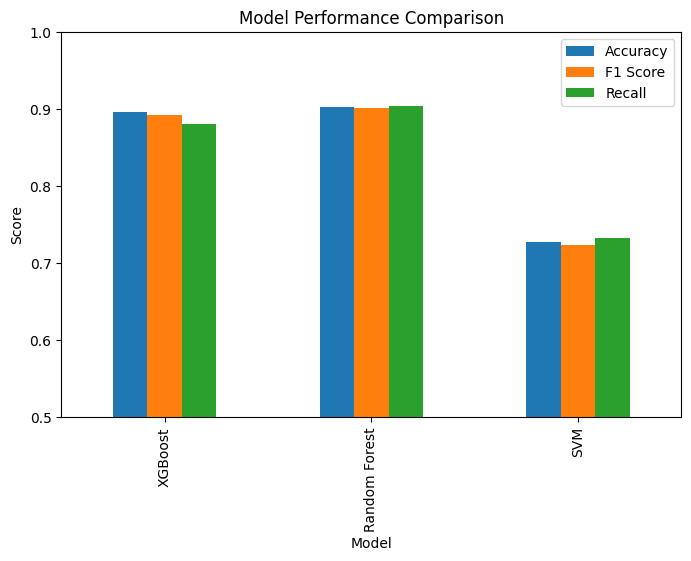

In [71]:
metrics_df.set_index("Model")[["Accuracy", "F1 Score", "Recall"]].plot(kind='bar', figsize=(8, 5), ylim=(0.5, 1.0))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.show()

In [70]:
metrics_df

,Model,Accuracy,F1 Score,Recall,Precision
0,XGBoost,0.8967,0.8926,0.8802,0.9053
1,Random Forest,0.9030,0.9008,0.9034,0.8982
2,SVM,0.7269,0.7233,0.7321,0.7146


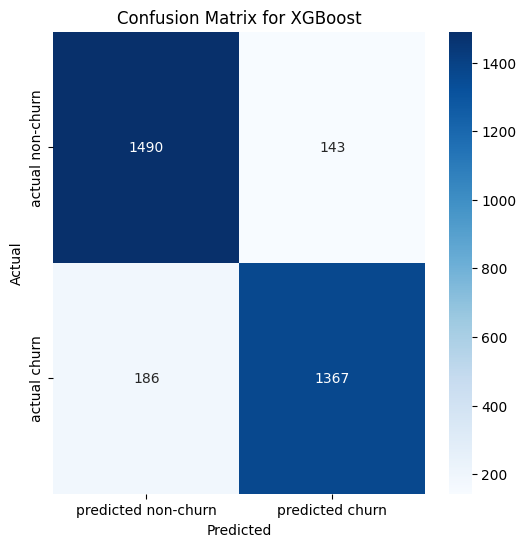

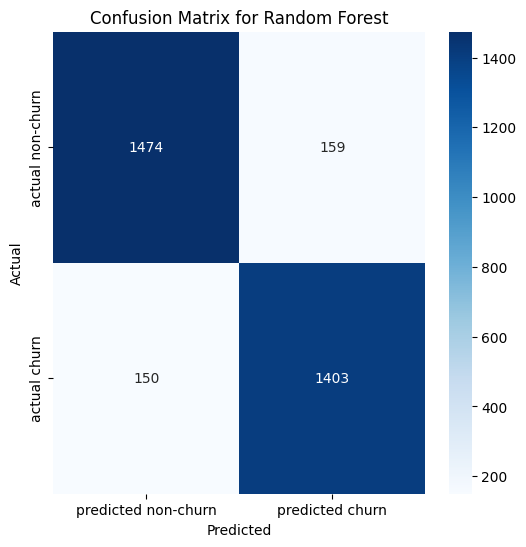

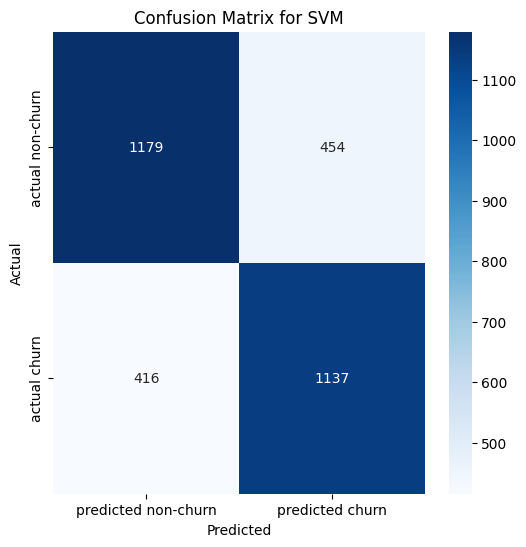

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

models = {
    "XGBoost": y_pred_XGB,
    "Random Forest": y_pred_rf,
    "SVM": y_pred_svm
}

for model_name, y_pred in models.items():
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['predicted non-churn', 'predicted churn'],
                yticklabels=['actual non-churn', 'actual churn'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()